Import required libraries and set up

In [5]:
#Imports and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


Locate data, read into notebook as a dataframe; Observe initial load of the data

In [6]:
file_path = "../data/raw/CMS_Beneficiary_Combined.csv"

df = pd.read_csv(file_path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349064 entries, 0 to 349063
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DESYNPUF_ID               349064 non-null  object 
 1   BENE_BIRTH_DT             349064 non-null  int64  
 2   BENE_DEATH_DT             5274 non-null    float64
 3   BENE_SEX_IDENT_CD         349064 non-null  int64  
 4   BENE_RACE_CD              349064 non-null  int64  
 5   BENE_ESRD_IND             349064 non-null  object 
 6   SP_STATE_CODE             349064 non-null  int64  
 7   BENE_COUNTY_CD            349064 non-null  int64  
 8   BENE_HI_CVRAGE_TOT_MONS   349064 non-null  int64  
 9   BENE_SMI_CVRAGE_TOT_MONS  349064 non-null  int64  
 10  BENE_HMO_CVRAGE_TOT_MONS  349064 non-null  int64  
 11  PLAN_CVRG_MOS_NUM         349064 non-null  int64  
 12  SP_ALZHDMTA               349064 non-null  int64  
 13  SP_CHF                    349064 non-null  i

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00000B48BCF4AD29,19230901,NaN,2,5,0,10,260,12,12,...,1,81000.0,3072.0,0.0,1520.0,80.0,0.0,6260.0,1520.0,0.0
1,0000525AB30E4DEF,19201001,NaN,2,1,0,31,300,12,12,...,1,13260.0,2048.0,0.0,1760.0,670.0,0.0,3830.0,1010.0,50.0
2,00009C897C3D8372,19320101,NaN,1,1,Y,7,70,12,12,...,2,37500.0,4096.0,0.0,100.0,160.0,0.0,1540.0,280.0,60.0
3,0001168CE43BE51B,19340901,NaN,2,1,0,6,200,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0002E494BC87CE10,19140701,NaN,1,2,0,5,200,2,2,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Data overview: understand the strucutre, data types and completeness 

In [11]:
df.shape

(349064, 32)

In [12]:
df.dtypes.value_counts()

int64      20
float64    10
object      2
Name: count, dtype: int64

In [13]:
#Basic info
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DESYNPUF_ID,349064,349064,00000B48BCF4AD29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BENE_BIRTH_DT,349064.0,NaN,NaN,NaN,19363761.036268,124945.593334,19090101.0,19281101.0,19360601.0,19420301.0,19831201.0
BENE_DEATH_DT,5274.0,NaN,NaN,NaN,20080649.217672,344.892633,20080101.0,20080401.0,20080601.0,20080976.0,20081201.0
BENE_SEX_IDENT_CD,349064.0,NaN,NaN,NaN,1.556726,0.496772,1.0,1.0,2.0,2.0,2.0
BENE_RACE_CD,349064.0,NaN,NaN,NaN,1.283381,0.754206,1.0,1.0,1.0,1.0,5.0
BENE_ESRD_IND,349064,2,0,324309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_STATE_CODE,349064.0,NaN,NaN,NaN,25.756618,15.561922,1.0,11.0,25.0,39.0,54.0
BENE_COUNTY_CD,349064.0,NaN,NaN,NaN,365.277812,266.150566,0.0,140.0,330.0,550.0,999.0
BENE_HI_CVRAGE_TOT_MONS,349064.0,NaN,NaN,NaN,11.142063,2.848267,0.0,12.0,12.0,12.0,12.0
BENE_SMI_CVRAGE_TOT_MONS,349064.0,NaN,NaN,NaN,10.491586,3.766494,0.0,12.0,12.0,12.0,12.0


BENE_DEATH_DT    0.984891
DESYNPUF_ID      0.000000
SP_DEPRESSN      0.000000
BENRES_CAR       0.000000
MEDREIMB_CAR     0.000000
PPPYMT_OP        0.000000
BENRES_OP        0.000000
MEDREIMB_OP      0.000000
PPPYMT_IP        0.000000
BENRES_IP        0.000000
MEDREIMB_IP      0.000000
SP_STRKETIA      0.000000
SP_RA_OA         0.000000
SP_OSTEOPRS      0.000000
SP_ISCHMCHT      0.000000
SP_DIABETES      0.000000
SP_COPD          0.000000
BENE_BIRTH_DT    0.000000
SP_CNCR          0.000000
SP_CHRNKIDN      0.000000
dtype: float64

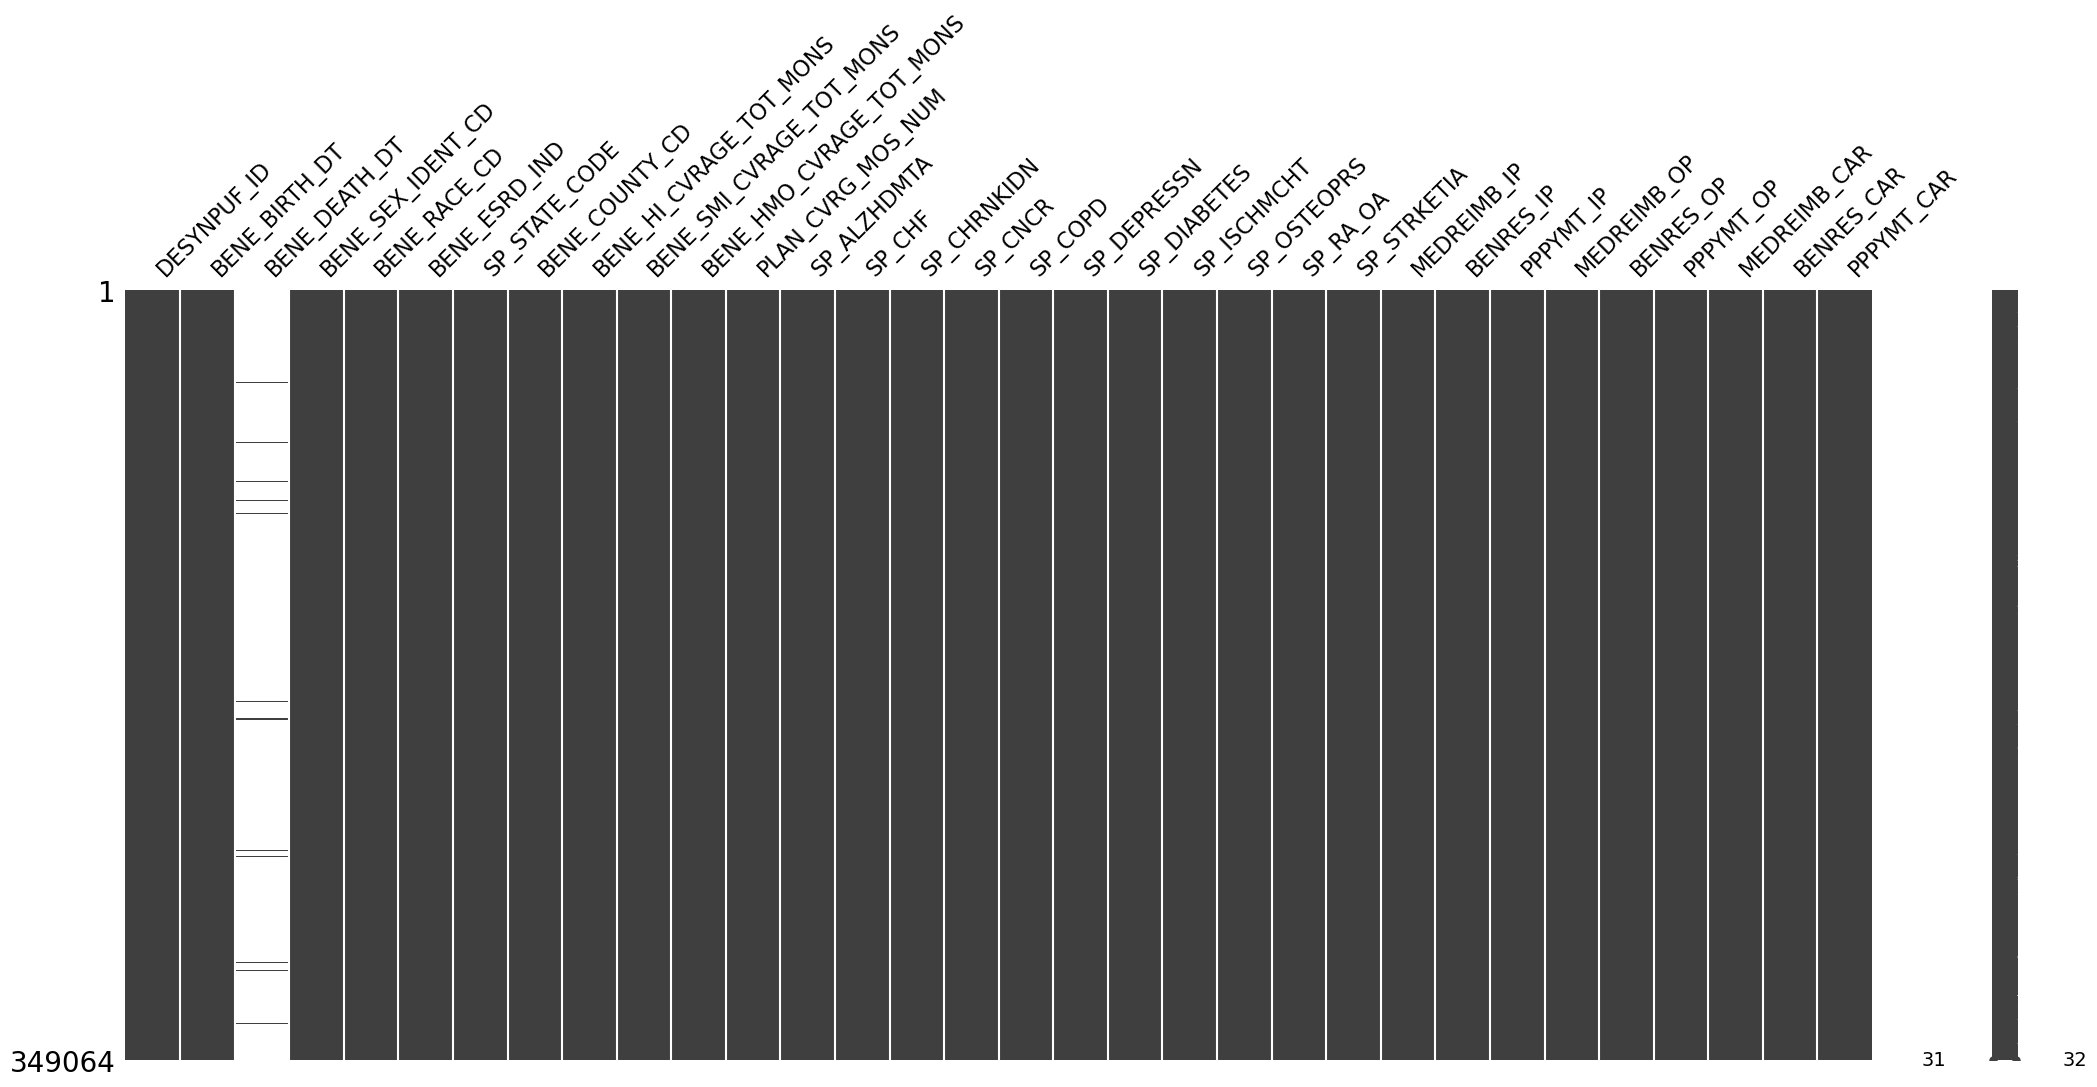

In [14]:
#Missing Data
msno.matrix(df)
df.isnull().mean().sort_values(ascending=False).head(20)